# Customer Analysis Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

## Activity 3 - Monday 2023-01-18

### 1. Loading Data

In [2]:
# Load datasets individually
ma_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
ma_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
ma_df.drop(columns=['effective_to_date'], inplace=True)

In [4]:
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   month                          10689 non-null  object
 6   employment_status              10689 non-null  object
 7   gender                         10689 non-null  object
 8   income                         10689 non-null  int64 
 9   location_code                  10689 non-null  object
 10  marital_status                 10689 non-null  object
 11  monthly_premium_auto           10689 non-null  int64 
 12  months_since_last_claim        10689 non-null  int64 
 13  m

### 2. Separating Data

#### 2.1.Getting Numeric Data

In [5]:
# Define a function for identifying numerical columns
def get_num_cols(df):
    num_cols = df.select_dtypes(include = np.number).columns
    return num_cols

In [6]:
numerical = ma_df[get_num_cols(ma_df)]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [7]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

#### 2.1.Getting Categorical Data

In [8]:
# Define a function for identifying categorical columns
def get_cat_cols(df):
    cat_cols = df.select_dtypes(include = object).columns # "exlude = np.number" can also work
    return cat_cols

In [9]:
categorical = ma_df[get_cat_cols(ma_df)]
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


In [10]:
get_cat_cols(ma_df)

Index(['region', 'response', 'coverage', 'education', 'month',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 3. Checking Normality

#### 3.1. Constructing Histograms

In [11]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


/Users/marcelzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcelzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcelzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

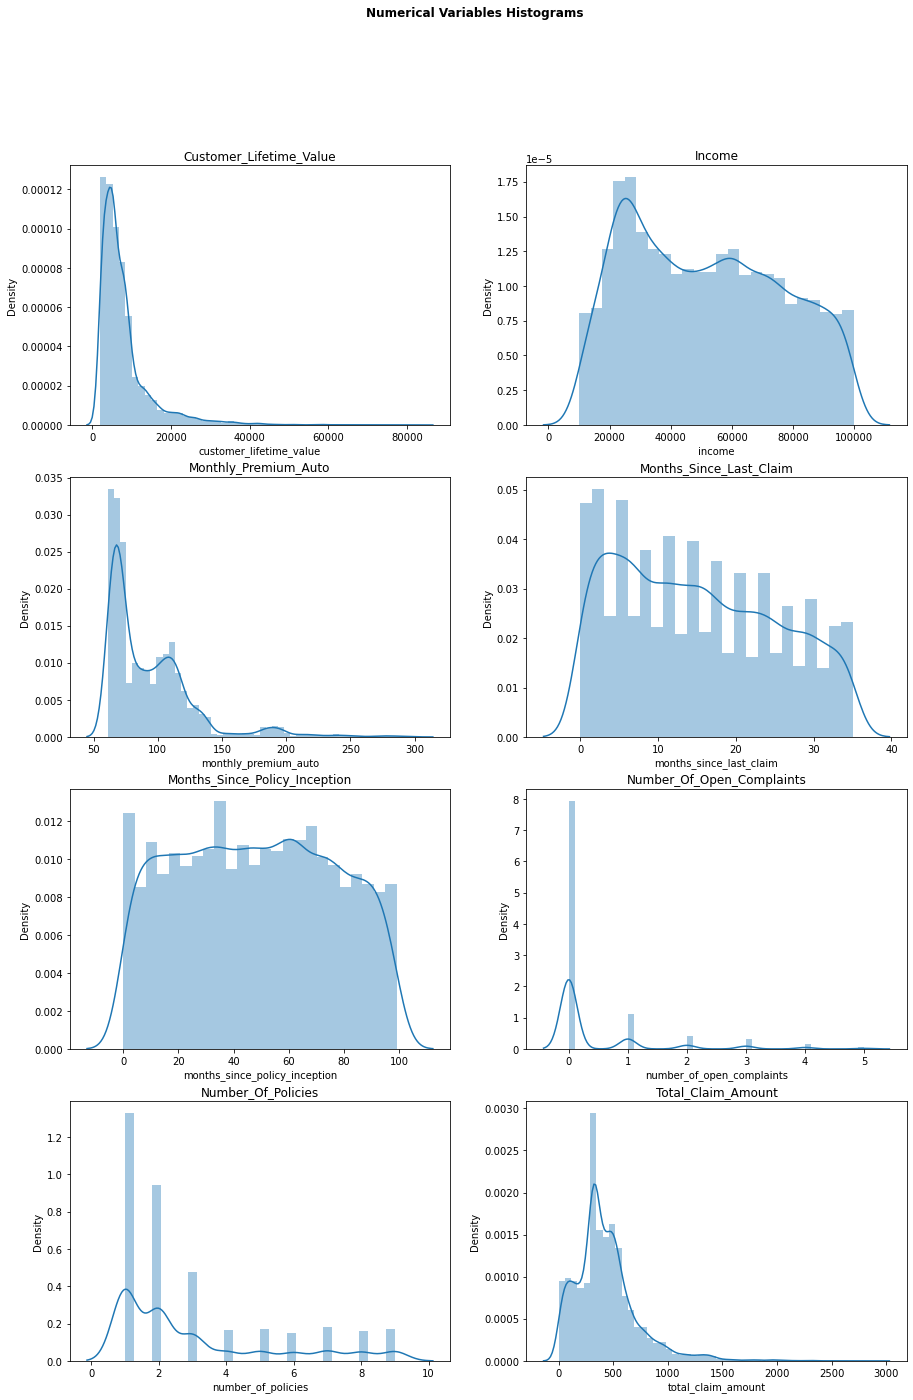

In [12]:
# Use seaborn library to construct distribution plots for the numerical variables.
# Define grid
fig1, ax1 = plt.subplots(4,2,figsize=(15,22))
plt.suptitle('Numerical Variables Histograms', fontweight = 'bold')

# Flatten the axes array or iteration
ax1 = ax1.flatten()

# Iterate over the columns
for i, column in enumerate(numerical.columns): 
#for i, ax in zip(range(6), axes.flat) # zip() creates a generator
    # Plot histograms for each columns in the corresponding slot
    #sns.histplot(data = numerical, x = column, ax = ax1[i])
    sns.distplot(numerical[column], ax = ax1[i], kde=True) # kde=True means the smooth curve (defult = True)
    # Set title for each histogram
    ax1[i].set_title(column.title())



In [13]:
#Use Matplotlib to construct histograms
# Realize manually

# fig2, ax2 = plt.subplots(4,2,figsize=(16,24))
# plt.suptitle("Numerical Variables Histograms", fontweight = "bold")

# plt.sca(ax2[0,0])
# plt.hist(numerical["customer_lifetime_value"])
# ax2[0,0].set_title("Customer Lifetime Value")

# plt.sca(ax2[0,1])
# plt.hist(numerical["income"])
# ax2[0,1].set_title("Income")

# plt.sca(ax2[1,0])
# plt.hist(numerical["monthly_premium_auto"])
# ax2[0,1].set_title("Income")

# plt.sca(ax2[1,1])
# plt.hist(numerical["months_since_last_claim"])
# ax2[1,1].set_title("Months Since Last Claim")

# plt.sca(ax2[2,0])
# plt.hist(numerical["months_since_policy_inception"])
# ax2[2,0].set_title("Months Since Policy Inception")

# plt.sca(ax2[2,1])
# plt.hist(numerical["number_of_open_complaints"])
# ax2[2,1].set_title("Number of Open Complaints")

# plt.sca(ax2[3,0])
# plt.hist(numerical["number_of_policies"])
# ax2[3,0].set_title("Number of Policies")

# plt.sca(ax2[3,1])
# plt.hist(numerical["total_claim_amount"])
# ax2[3,1].set_title("Total Claim Amount")

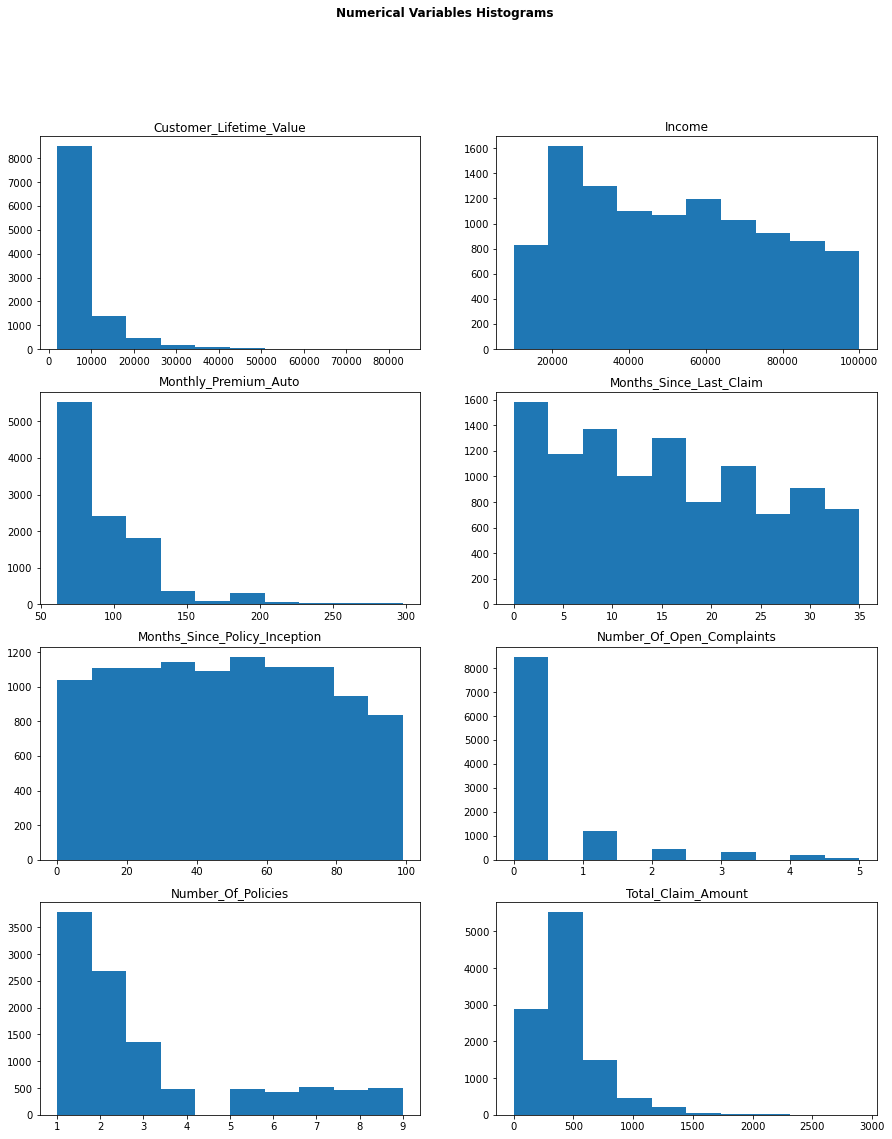

In [14]:
#Use for loop
fig2, ax2 = plt.subplots(4,2,figsize=(15,18))
plt.suptitle('Numerical Variables Histograms', fontweight = 'bold')

for i, column in enumerate(numerical.columns):
    # Locate where to plot
    plt.sca(ax2[i//2,i%2])
    # Plot histograms
    plt.hist(numerical[column])
    # Add subtitles respectively
    ax2[i//2,i%2].set_title(column.title())

### 4. Checking for Correlation

In [15]:
# Get a the list of input features (excluding the target feature 'total_claim_amount')
input_feat = numerical.columns.tolist()
input_feat.remove('total_claim_amount')

In [16]:
input_feat

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [17]:
# Print out a correlation matrix
corr_matrix_input_feat = numerical[input_feat].corr()
print(corr_matrix_input_feat)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                 1.000000   
months_since_policy_inception              0.019696    

<AxesSubplot:>

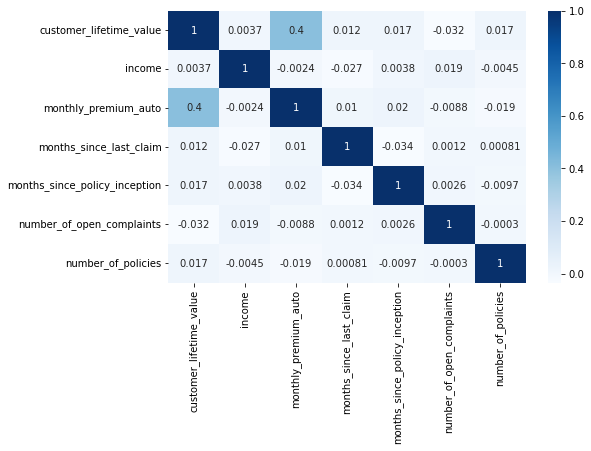

In [18]:
# Create a heatmap
fig3 = plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix_input_feat,annot=True, cmap='Blues') # Another choice of plette: cmap='coolwarm'

In [19]:
# There is no pair of features that have a correlation greater than 0.9, then no features need to be dropped.

## Activity 3 - Monday 2023-01-19

### 5. Plotting

#### 5.1. Total Number of Responses

Text(0.5, 1.0, 'Total Number of Responses')

<Figure size 576x360 with 0 Axes>

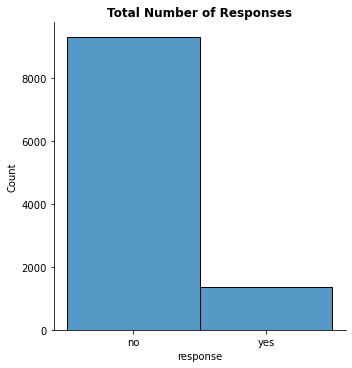

In [20]:
fig4 = plt.figure(figsize=(8,5))
sns.displot(data = categorical['response'], palette='Blues')
plt.title('Total Number of Responses', fontweight = 'bold')

#### 5.2. Number of Responses by Sales Channel

In [21]:
# Prepare the data in a table 
response_count_by_sales_channel = categorical.groupby(['sales_channel', 'response'])['response'].count().rename('count').reset_index()
response_count_by_sales_channel

,sales_channel,response,count
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


<AxesSubplot:title={'center':'Number of Responses by Sales Channel'}, xlabel='sales_channel', ylabel='count'>

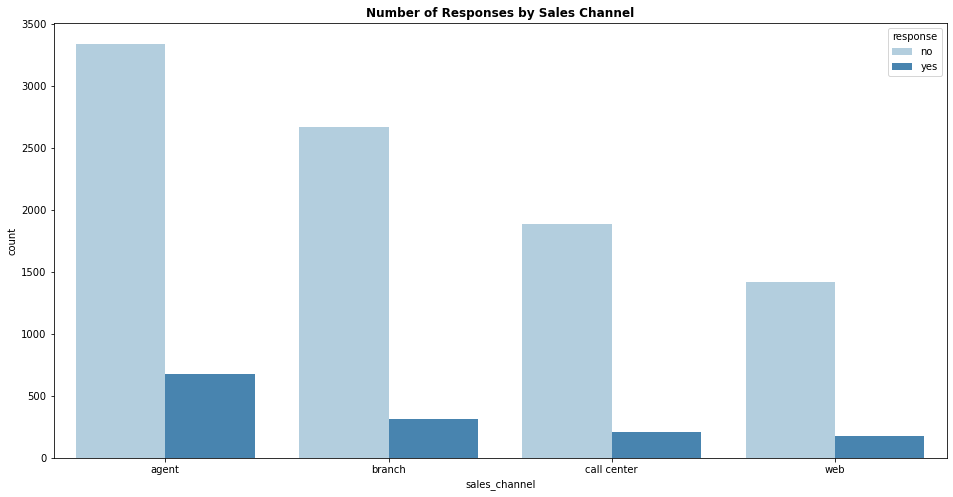

In [22]:
fig5 = plt.figure(figsize=(16,8))
plt.title('Number of Responses by Sales Channel', fontweight = 'bold')

sns.barplot(x = response_count_by_sales_channel['sales_channel'],\
            y = response_count_by_sales_channel['count'], \
            hue = response_count_by_sales_channel['response'], \
            palette = 'Blues')

#### 5.3. Number of Responses by Total Claim Amount

In [24]:
# Creating buckets / groups of data
total_claim_amount_labels = ['low', 'moderate', 'high']
ma_df['total_claim_amount_binned'] = pd.cut(ma_df['total_claim_amount'],3, labels=total_claim_amount_labels)

,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_binned
0,central,4809,no,basic,college,feb,employed,m,48029,suburban,...,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,low
1,west region,2228,no,basic,college,jan,unemployed,f,92260,suburban,...,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,low
2,east,14947,no,basic,bachelor,feb,employed,m,22139,suburban,...,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize,low
3,north west,22332,yes,extended,college,jan,employed,m,49078,suburban,...,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,low
4,north west,9025,no,premium,bachelor,jan,medical leave,f,23675,suburban,...,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,jan,unemployed,f,61541,suburban,...,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,moderate
10685,north west,5259,no,basic,college,jan,employed,f,61146,urban,...,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,low
10686,central,23893,no,extended,bachelor,feb,employed,f,39837,rural,...,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,low
10687,west region,11971,no,premium,college,feb,employed,f,64195,urban,...,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize,low


In [25]:
# Prepare the data in a table 
response_count_by_total_claim_amount = ma_df.groupby(['total_claim_amount_binned', 'response'])['response'].count().rename('count').reset_index()
response_count_by_total_claim_amount

,total_claim_amount_binned,response,count
0,low,no,8845
1,low,yes,1308
2,moderate,no,437
3,moderate,yes,65
4,high,no,34
5,high,yes,0


<AxesSubplot:title={'center':'Number of Responses by Total Claim Amount'}, xlabel='total_claim_amount_binned', ylabel='count'>

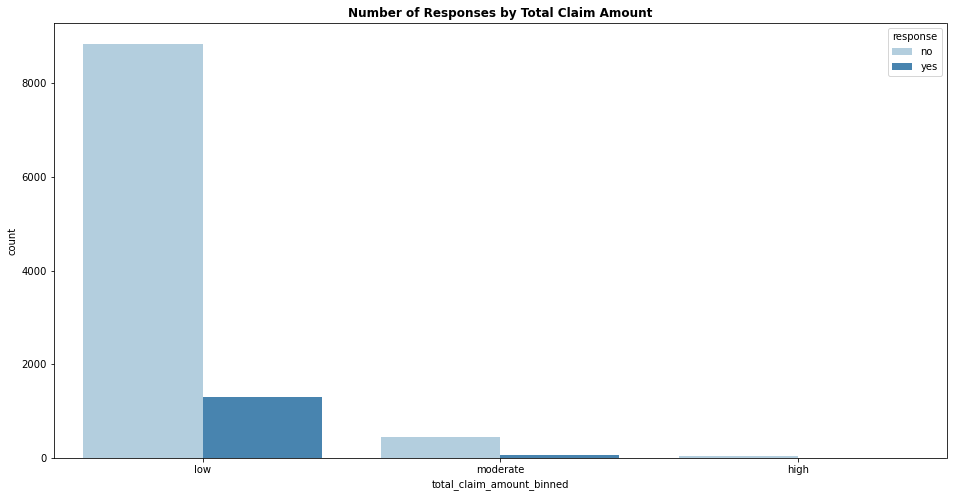

In [26]:
# Plot the line chart
fig6 = plt.figure(figsize=(16,8))
plt.title('Number of Responses by Total Claim Amount', fontweight = 'bold')

sns.barplot(x = response_count_by_total_claim_amount['total_claim_amount_binned'],\
             y = response_count_by_total_claim_amount['count'], \
             hue = response_count_by_total_claim_amount['response'], \
             palette = 'Blues')

#### 5.4. Number of Responses by Income

In [27]:
# Creating buckets of income
pd.cut(ma_df['income'],4)

0         (32523.0, 55009.0]
1         (77495.0, 99981.0]
2        (9947.056, 32523.0]
3         (32523.0, 55009.0]
4        (9947.056, 32523.0]
                ...         
10684     (55009.0, 77495.0]
10685     (55009.0, 77495.0]
10686     (32523.0, 55009.0]
10687     (55009.0, 77495.0]
10688     (55009.0, 77495.0]
Name: income, Length: 10689, dtype: category
Categories (4, interval[float64, right]): [(9947.056, 32523.0] < (32523.0, 55009.0] < (55009.0, 77495.0] < (77495.0, 99981.0]]

In [28]:
#
income_labels = ['low', 'moderate', 'high', 'very high']
ma_df['income_binned'] = pd.cut(ma_df['income'],4, labels=income_labels)
ma_df

,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_binned,income_binned
0,central,4809,no,basic,college,feb,employed,m,48029,suburban,...,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,low,moderate
1,west region,2228,no,basic,college,jan,unemployed,f,92260,suburban,...,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,low,very high
2,east,14947,no,basic,bachelor,feb,employed,m,22139,suburban,...,2,personal auto,personal l3,offer3,call center,480,suv,medsize,low,low
3,north west,22332,yes,extended,college,jan,employed,m,49078,suburban,...,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,low,moderate
4,north west,9025,no,premium,bachelor,jan,medical leave,f,23675,suburban,...,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,jan,unemployed,f,61541,suburban,...,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,moderate,high
10685,north west,5259,no,basic,college,jan,employed,f,61146,urban,...,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,low,high
10686,central,23893,no,extended,bachelor,feb,employed,f,39837,rural,...,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,low,moderate
10687,west region,11971,no,premium,college,feb,employed,f,64195,urban,...,6,personal auto,personal l1,offer1,branch,618,suv,medsize,low,high


In [29]:
# Prepare the data in a table 
response_count_by_income = ma_df.groupby(['income_binned', 'response'])['response'].count().rename('count').reset_index()
response_count_by_income

,income_binned,response,count
0,low,no,2630
1,low,yes,508
2,moderate,no,2460
3,moderate,yes,310
4,high,no,2373
5,high,yes,355
6,very high,no,1853
7,very high,yes,200


<AxesSubplot:title={'center':'Number of Responses by Income'}, xlabel='income_binned', ylabel='count'>

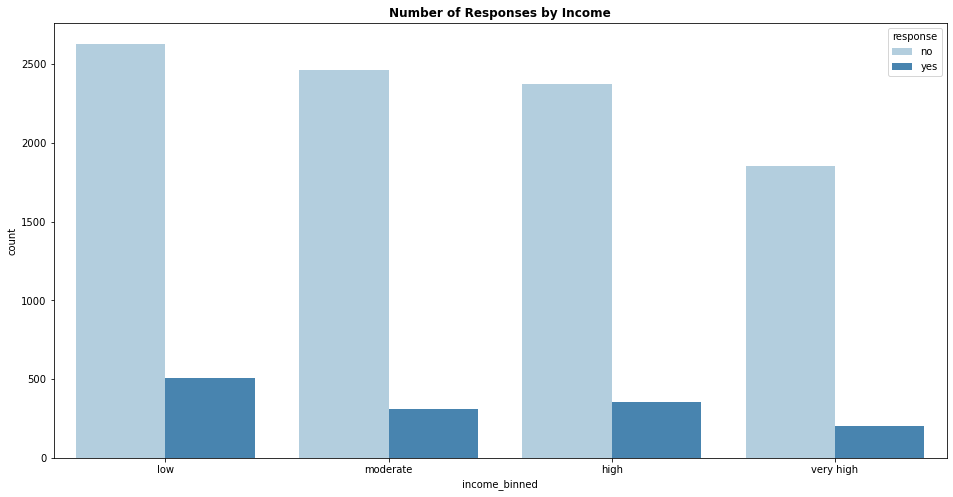

In [30]:
fig7 = plt.figure(figsize=(16,8))
plt.title('Number of Responses by Income', fontweight = 'bold')

sns.barplot(x = response_count_by_income['income_binned'],\
             y = response_count_by_income['count'], \
             hue = response_count_by_income['response'], \
             palette = 'Blues')


### 6. Insight Exploration

#### 6.1. Create Correlation Heatmap for All Numerical Variables

<AxesSubplot:>

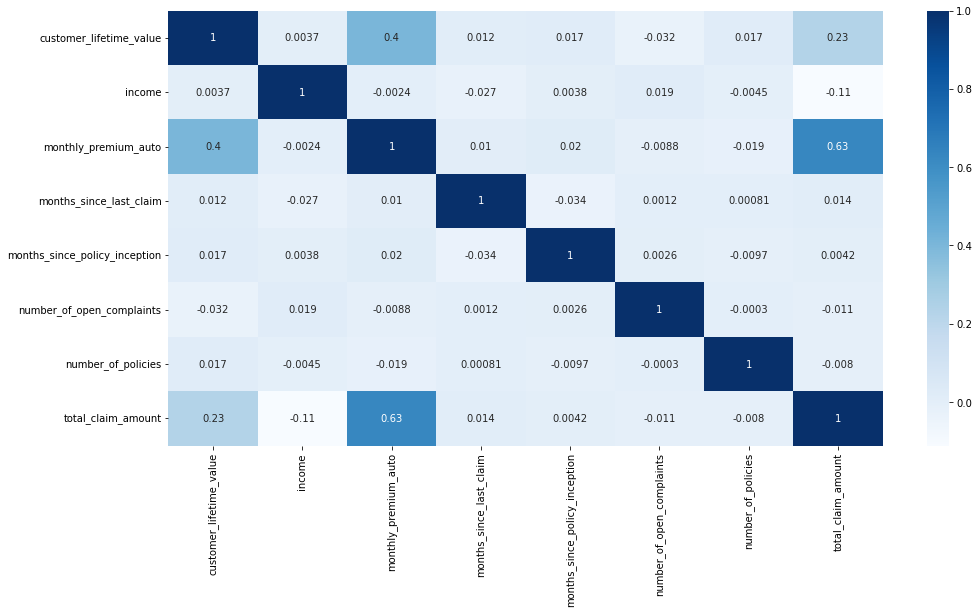

In [31]:
# Create a heatmap
fig8 = plt.figure(figsize=(16,8))
sns.heatmap(numerical.corr(),annot=True, cmap='Blues') 

While almost all variables are not significantly correlated with the terget feature "Total Claim Amount", its correlation with Monthly Premium Auto is relatively high. 

#### 6.2. Monthly Premium

In [33]:
# Creating buckets of Monthly Premium
monthly_premium_auto_labels = ['low', 'moderate', 'high', 'very high']
ma_df['monthly_premium_auto_binned'] = pd.cut(ma_df['monthly_premium_auto'],4, labels=monthly_premium_auto_labels)

,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_binned,income_binned,monthly_premium_auto_binned
0,central,4809,no,basic,college,feb,employed,m,48029,suburban,...,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,low,moderate,low
1,west region,2228,no,basic,college,jan,unemployed,f,92260,suburban,...,personal auto,personal l3,offer4,call center,744,four-door car,medsize,low,very high,low
2,east,14947,no,basic,bachelor,feb,employed,m,22139,suburban,...,personal auto,personal l3,offer3,call center,480,suv,medsize,low,low,low
3,north west,22332,yes,extended,college,jan,employed,m,49078,suburban,...,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,low,moderate,low
4,north west,9025,no,premium,bachelor,jan,medical leave,f,23675,suburban,...,personal auto,personal l2,offer1,branch,707,four-door car,medsize,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,jan,unemployed,f,61541,suburban,...,personal auto,personal l1,offer3,web,1214,luxury car,medsize,moderate,high,very high
10685,north west,5259,no,basic,college,jan,employed,f,61146,urban,...,personal auto,personal l3,offer2,branch,273,four-door car,medsize,low,high,low
10686,central,23893,no,extended,bachelor,feb,employed,f,39837,rural,...,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,low,moderate,high
10687,west region,11971,no,premium,college,feb,employed,f,64195,urban,...,personal auto,personal l1,offer1,branch,618,suv,medsize,low,high,moderate


Text(0, 0.5, 'Median Claim Amount')

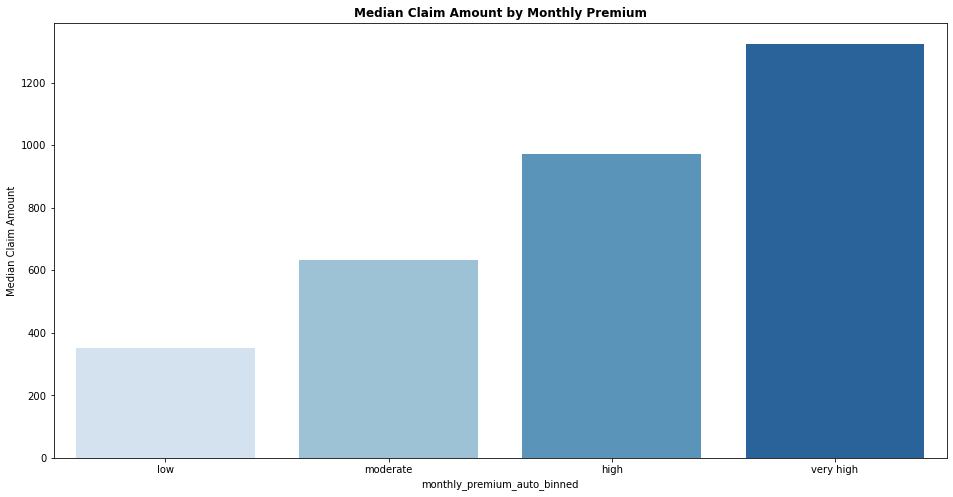

In [34]:
fig9 = plt.figure(figsize=(16,8))
median_claim_amount_by_monthly_premium_binned = ma_df.groupby('monthly_premium_auto_binned')['total_claim_amount'].median()
sns.barplot(data = ma_df, \
            x = median_claim_amount_by_monthly_premium_binned.index, \
            y = median_claim_amount_by_monthly_premium_binned.values, \
            palette = 'Blues')
plt.title("Median Claim Amount by Monthly Premium", fontweight = 'bold')
plt.ylabel("Median Claim Amount")


#### 6.3. Customer Lifetime Value (CLV)

In [36]:
# Creating buckets / groups of CLV
clv_labels = ['low', 'moderate', 'high', 'very high']
ma_df['clv_binned'] = pd.cut(ma_df['customer_lifetime_value'],4, labels=clv_labels)

,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_binned,income_binned,monthly_premium_auto_binned,clv_binned
0,central,4809,no,basic,college,feb,employed,m,48029,suburban,...,corporate l3,offer3,agent,292,four-door car,medsize,low,moderate,low,low
1,west region,2228,no,basic,college,jan,unemployed,f,92260,suburban,...,personal l3,offer4,call center,744,four-door car,medsize,low,very high,low,low
2,east,14947,no,basic,bachelor,feb,employed,m,22139,suburban,...,personal l3,offer3,call center,480,suv,medsize,low,low,low,low
3,north west,22332,yes,extended,college,jan,employed,m,49078,suburban,...,corporate l3,offer2,branch,484,four-door car,medsize,low,moderate,low,moderate
4,north west,9025,no,premium,bachelor,jan,medical leave,f,23675,suburban,...,personal l2,offer1,branch,707,four-door car,medsize,low,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,jan,unemployed,f,61541,suburban,...,personal l1,offer3,web,1214,luxury car,medsize,moderate,high,very high,low
10685,north west,5259,no,basic,college,jan,employed,f,61146,urban,...,personal l3,offer2,branch,273,four-door car,medsize,low,high,low,low
10686,central,23893,no,extended,bachelor,feb,employed,f,39837,rural,...,corporate l3,offer1,web,381,luxury suv,medsize,low,moderate,high,moderate
10687,west region,11971,no,premium,college,feb,employed,f,64195,urban,...,personal l1,offer1,branch,618,suv,medsize,low,high,moderate,low


Text(0.5, 0, 'Customer Lifetime Value')

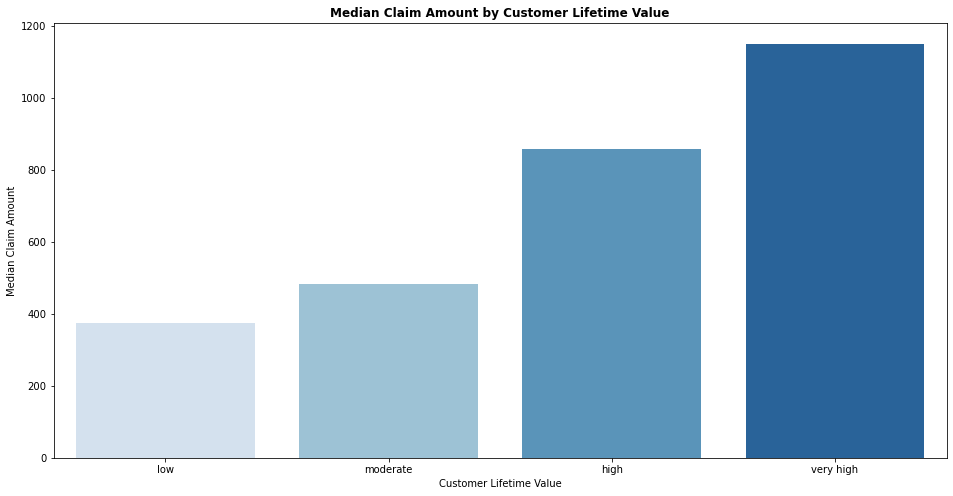

In [39]:
median_claim_amount_by_clv_binned = ma_df.groupby('clv_binned')['total_claim_amount'].median()
fig10 = plt.figure(figsize=(16,8))
sns.barplot(data = ma_df, \
            x = median_claim_amount_by_clv_binned.index, \
            y = median_claim_amount_by_clv_binned.values, \
            palette = 'Blues')
plt.title("Median Claim Amount by Customer Lifetime Value", fontweight = 'bold')
plt.ylabel("Median Claim Amount")
plt.xlabel("Customer Lifetime Value")

#### 6.4. Other Categorical Variables

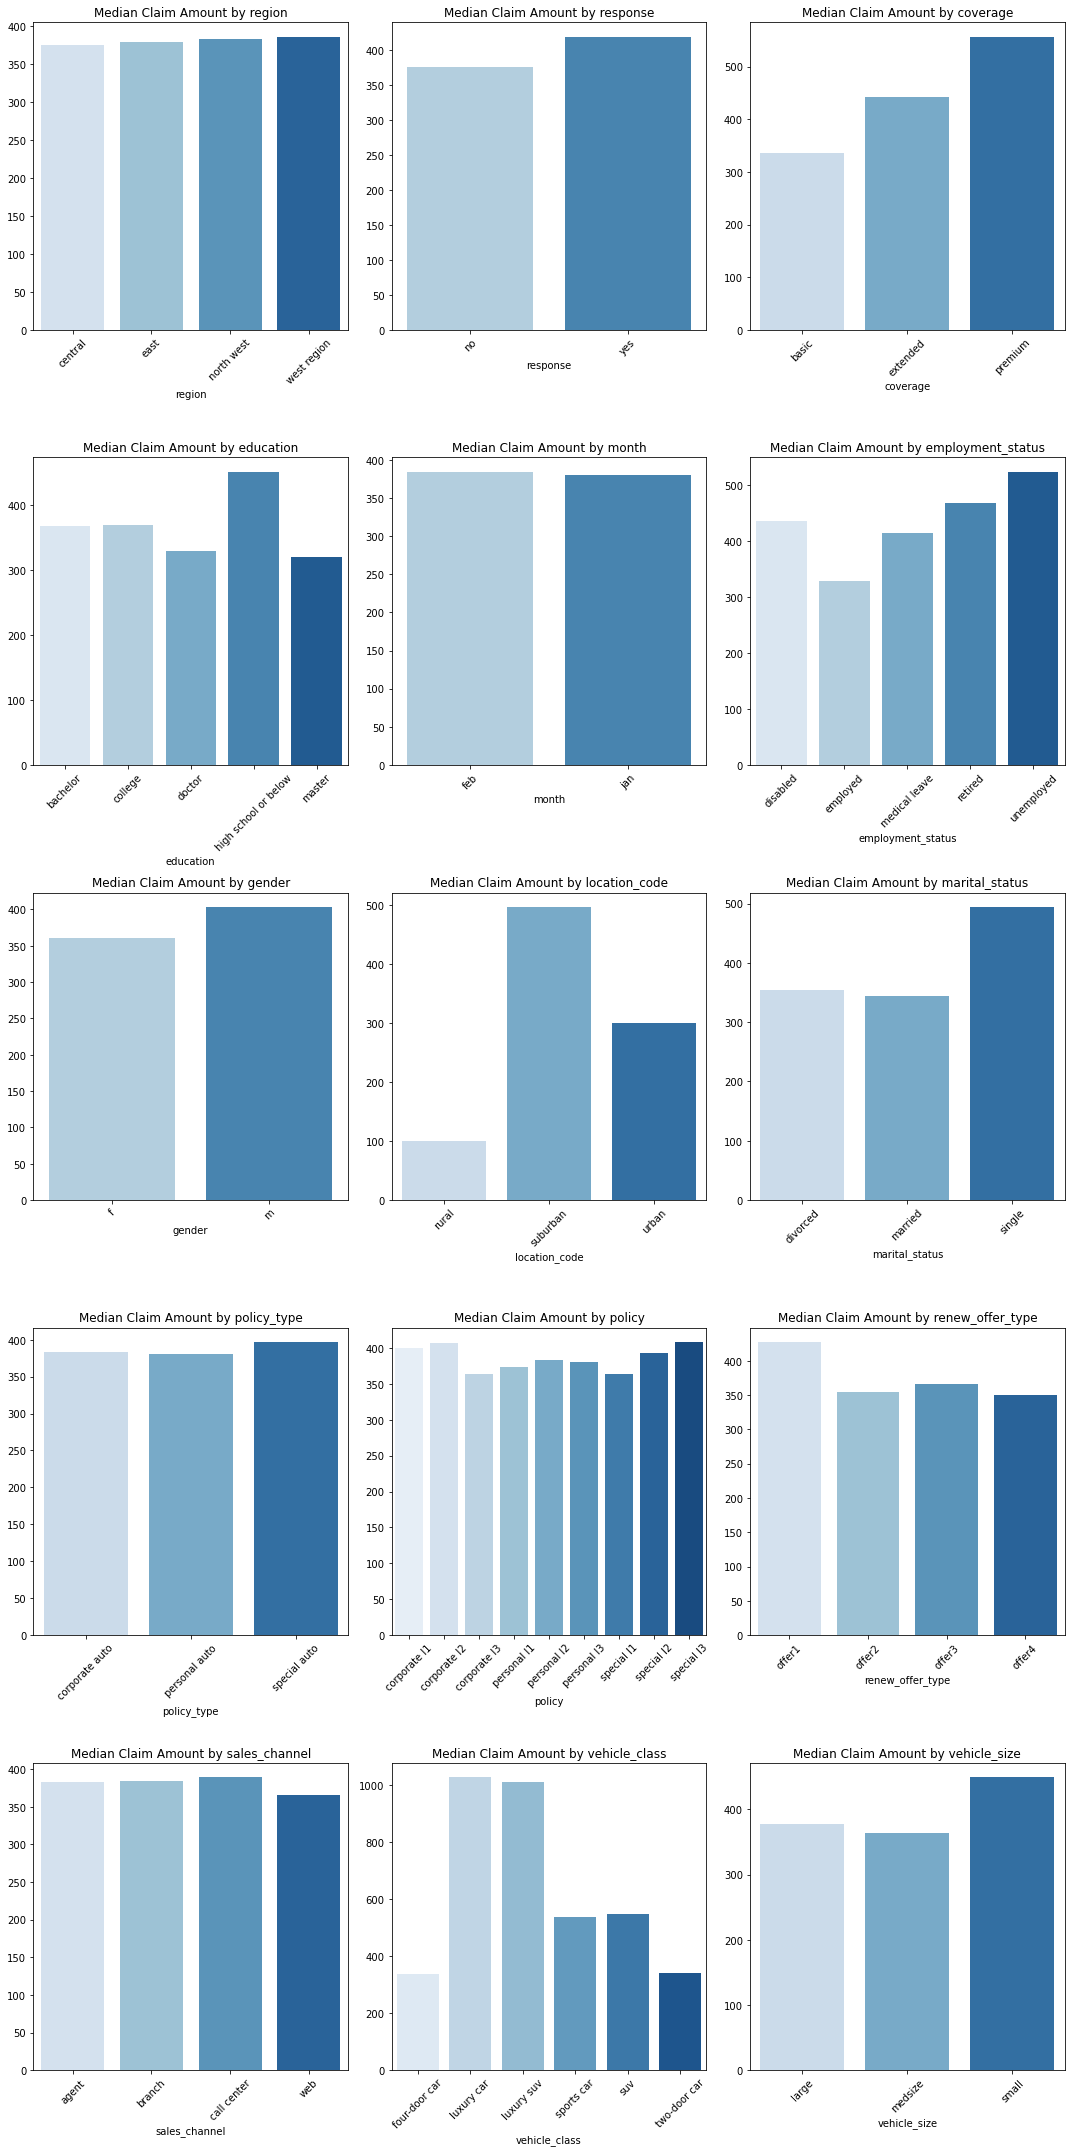

In [45]:
categorical_col = ma_df.select_dtypes(include = object).columns
fig, axs = plt.subplots(5, 3, figsize=(15, 30))
axs = axs.ravel()
for i, var in enumerate(categorical_col):
    median_total_claim_amount = ma_df.groupby(var)['total_claim_amount'].median()
    sns.barplot(data = ma_df, \
                x = median_total_claim_amount.index, \
                y = median_total_claim_amount.values, \
                palette = 'Blues', ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_title(f'Median Claim Amount by {var}')
    
plt.tight_layout()

Text(0.5, 0, 'Location')

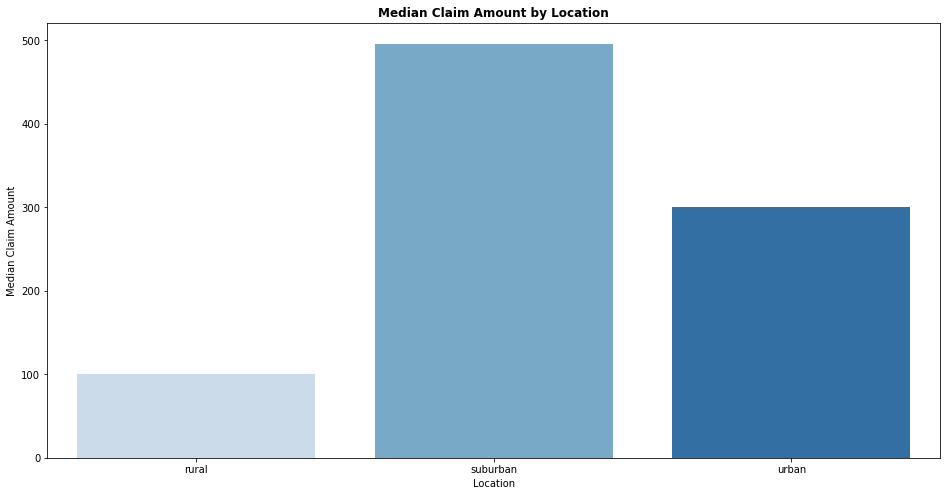

In [47]:
fig11 = plt.figure(figsize=(16,8))
median_total_claim_amount_by_location = ma_df.groupby('location_code')['total_claim_amount'].median()
sns.barplot(data = ma_df, \
            x = median_total_claim_amount_by_location.index, \
            y = median_total_claim_amount_by_location.values, \
            palette = 'Blues')
plt.title("Median Claim Amount by Location", fontweight = 'bold')
plt.ylabel("Median Claim Amount")
plt.xlabel("Location")